In [18]:
import networkx as nx
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
%matplotlib notebook
import csv
import os
import itertools

In [2]:
from scripts.utility import *
from scripts.features import *

# Features
It is a good idea to save our features in text files, so that we only have to calculate them once. Later on when we employ clustering, we can just read the values off of these files instead of iterating over the graphs again, which is time consuming.

## 1. Geometrical

### 1.1 Number of nodes and edges

In [ ]:
# Calculate the number of nodes and edges for each network and save them to files
with open('features/n_nodes.txt', 'w') as node_file, open('features/n_edges.txt', 'w') as edge_file:
    for network_id, G in graph_generator():
        node_file.write(network_id + '\t' + str(nx.number_of_nodes(G)) + '\n') # nx.number_of_nodes() function
        edge_file.write(network_id + '\t' + str(nx.number_of_edges(G)) + '\n') # use tab character \t, not two spaces
        
###NOTE: Have to pull features from github before running script
##IDEA: Can calculate every feature on the same loop

### 1.2 Average node degree

In [ ]:
# Calculate the average node degree, i.e. the average number of edges that are connected to a node,
# for each network and write them to a file
with open('features/average_node_degree.txt', 'w') as file:
    for network_id, G in graph_generator(): # check this access to graph_generator
        average_node_degree = np.mean(list(G.degree().values()))
        file.write(network_id + '\t' + str(average_node_degree) + '\n')

### 1.3 Vein density

Vein density **$\sigma$** is calculated by summing the total length of all veins and dividing by total leaf area.


In [ ]:
save_feature(vein_density, skip_existing=True, clean=False)

### 1.4 Areole area

Areole area **$A$** is obtained calculating basic cycle areas using the standard formula for the area of a general polygon.

In [ ]:
save_feature(areole_area, skip_existing=True, clean=False)

### 1.5 Areole density 

Areole density **$\rho_A$** is the total number of areoles divided by leaf area.

In [ ]:
save_feature(areole_density, skip_existing=True, clean=False)

### 1.6 Weighted vein thickness

Weighted vein thickness **$d$** is calculated as the total sum of the product radius*length of each
    individual vein segment divided by total vein length

In [ ]:
save_feature(weighted_vein_thickness, skip_existing=True, clean=False)

## 2. Topological

### 2.1 Nesting number

In [ ]:
save_feature(nesting_numbers, skip_existing=True, clean=True)

# Data Analysis

In [ ]:
generator = graph_generator()

In [ ]:
_, G = next(generator)

## Principal Component Analysis

In [24]:
data = read_features()

In [47]:
feature_names = [
    #'areol_area',
    'areole_density',
    'average_node_degree',
    #'n_edges',
    #'n_nodes',
    'nesting_number_weighted',
    'nesting_number_weighted_no_ext',
    'nesting_number_unweighted',
    'nesting_number_unweighted_no_ext',
    'topological_length',
    'vein_density',
    'weighted_vein_thickness',
]

In [48]:
network_ids = sorted(data['nesting_number_weighted'].keys())
X = []
for feature_name in feature_names:
    if feature_name in ['areole_area', 'n_nodes', 'n_edges']:
        continue
    row = [data[feature_name][network_id] for network_id in network_ids]
    X.append(row)
X = np.array(X)
X = X.T

In [49]:
pca = PCA()
pca.fit(normalize(X))

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [50]:
normalized_eigenvalues = pca.explained_variance_ratio_

In [51]:
principal_components = pca.components_

In [52]:
scaled_principal_components = (normalized_eigenvalues * principal_components.T).T
print(scaled_principal_components)

[[ -1.07356414e-05  -5.82673233e-01  -1.01911102e-01  -1.13538455e-01
   -1.34996320e-01  -1.38214548e-01  -5.62401076e-01  -2.66412073e-03
    3.66894576e-01]
 [  9.68631593e-07  -1.69691356e-02   2.74227388e-02   3.28800332e-02
    7.32852782e-03   9.00309957e-03   1.47601424e-03   4.20859025e-04
   -8.03267661e-04]
 [ -2.96398411e-07  -1.43647375e-02  -3.68371905e-03  -5.08629401e-03
    3.82336653e-04  -2.95987685e-04   1.64904452e-02  -1.50029923e-04
   -1.04392953e-04]
 [  1.04821864e-07   1.92638027e-04   8.36863039e-04   9.74797076e-04
   -3.06970268e-03  -3.40667269e-03   6.62130564e-04   2.43095611e-05
   -5.57639683e-04]
 [  1.76609825e-07  -4.51789102e-04   1.86292733e-05  -2.73792116e-04
    2.43919144e-04  -1.64996559e-04  -4.91542979e-04   6.04194522e-05
   -1.52248883e-03]
 [  7.46398352e-08   3.09549906e-05   2.43477103e-04  -1.78713809e-04
    2.78309941e-04  -2.52401491e-04   1.60318902e-05   2.10234139e-05
    9.35320356e-05]
 [  1.30683655e-08   2.54849864e-07  -7.

In [58]:
relative_feature_contributions = abs(np.sum(scaled_principal_components, axis=0))
print(relative_feature_contributions)

[  9.61610583e-06   6.14234973e-01   7.71507715e-02   8.51565275e-02
   1.29774663e-01   1.33384205e-01   5.44246651e-01   2.24809779e-03
   3.64003597e-01]


<IPython.core.display.Javascript object>


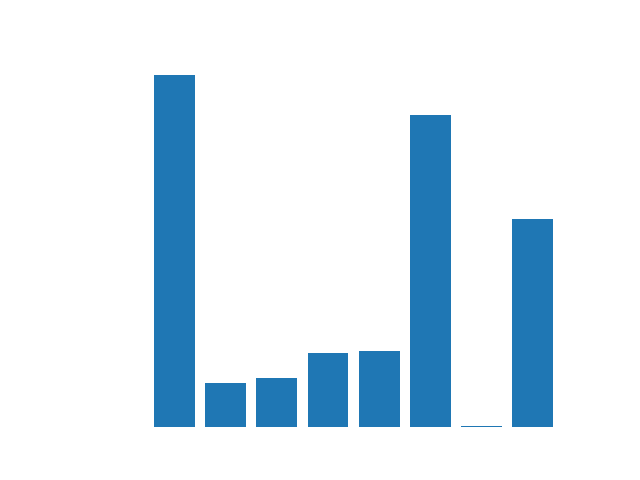

In [68]:
fig, ax = plt.subplots()
x = np.arange(len(relative_feature_contributions))
ax.bar(x, relative_feature_contributions)
labels = ['$deg_N$', '$i_w$', '$i_w^{no}$', '$i_u$', '$i_u^{no}$', '$L_{top}$', '$\rho_A$', '$d$']
ax.set_xticks(x)
ax.set_xticklabels(labels)